# DTI 계산기 만들기

## 원금균등 분할 방식 DTI 계산기 만들기

### DTI 계산공식

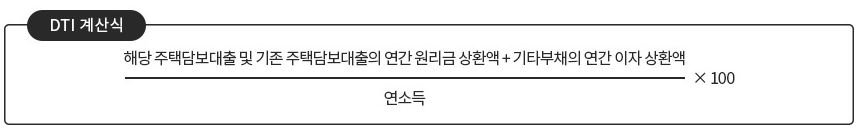

In [1]:
from IPython.display import Image
Image('data/DTI계산공식.JPG')

#### 데이터 입력 : 대출원금, 상환연수, 연이율, 기타부채, 기타부채연이율, 본인소득

In [2]:
대출원금 = 194000000
상환기간 = 120
연이율 = 4
기타부채 = 43871000
기타부채연이율 = 4
본인소득 = 44000000

In [3]:
월이율 = 연이율/100/12
월이율

0.0033333333333333335

In [6]:
기타부채연이율 = 기타부채연이율/100
기타부채연이율

0.04

### 원금균등 방식의 납입원금 게산

In [7]:
납입원금 = 대출원금 / 상환기간
납입원금 = round(납입원금)
납입원금

1616667

### 초년도 납입액 계산

#### 초년도납입액 계산을 위해 1년(12개월) 대출금 계산 및 데이터프레임 생성

In [9]:
대출이자 = 0
월납입액 = 0
대출잔액 = 대출원금

회차별대출금 = []
for 회차 in range(1, 12 + 1):
    대출이자 = round(대출잔액 * 월이율)    
    대출잔액 = 대출잔액 - 납입원금
    월납입액 = 납입원금 + 대출이자
    if 대출잔액 < 0:
        대출잔액 = 0
    print([회차, 월납입액, 납입원금, 대출이자, 대출잔액])
    회차별대출금.append([회차, 월납입액, 납입원금, 대출이자, 대출잔액])

[1, 2263334, 1616667, 646667, 192383333]
[2, 2257945, 1616667, 641278, 190766666]
[3, 2252556, 1616667, 635889, 189149999]
[4, 2247167, 1616667, 630500, 187533332]
[5, 2241778, 1616667, 625111, 185916665]
[6, 2236389, 1616667, 619722, 184299998]
[7, 2231000, 1616667, 614333, 182683331]
[8, 2225611, 1616667, 608944, 181066664]
[9, 2220223, 1616667, 603556, 179449997]
[10, 2214834, 1616667, 598167, 177833330]
[11, 2209445, 1616667, 592778, 176216663]
[12, 2204056, 1616667, 587389, 174599996]


In [10]:
import pandas as pd

In [11]:
원금균등대출금 = pd.DataFrame(회차별대출금)
원금균등대출금

,0,1,2,3,4
0,1,2263334,1616667,646667,192383333
1,2,2257945,1616667,641278,190766666
2,3,2252556,1616667,635889,189149999
3,4,2247167,1616667,630500,187533332
4,5,2241778,1616667,625111,185916665
5,6,2236389,1616667,619722,184299998
6,7,2231000,1616667,614333,182683331
7,8,2225611,1616667,608944,181066664
8,9,2220223,1616667,603556,179449997
9,10,2214834,1616667,598167,177833330


In [12]:
원금균등대출금.columns = ['회차', '월납입액', '납입원금', '대출이자', '대출잔액']
원금균등대출금

,회차,월납입액,납입원금,대출이자,대출잔액
0,1,2263334,1616667,646667,192383333
1,2,2257945,1616667,641278,190766666
2,3,2252556,1616667,635889,189149999
3,4,2247167,1616667,630500,187533332
4,5,2241778,1616667,625111,185916665
5,6,2236389,1616667,619722,184299998
6,7,2231000,1616667,614333,182683331
7,8,2225611,1616667,608944,181066664
8,9,2220223,1616667,603556,179449997
9,10,2214834,1616667,598167,177833330


#### 데이터프레임 검색

In [13]:
회차1 = 원금균등대출금[원금균등대출금.회차 == 1]
회차1

,회차,월납입액,납입원금,대출이자,대출잔액
0,1,2263334,1616667,646667,192383333


In [14]:
회차1.월납입액.item()

2263334

### Pandas 컬럼함수 종류

#### 컬럼 전체 조회 및 SUM

In [15]:
원금균등대출금.대출이자

0     646667
1     641278
2     635889
3     630500
4     625111
5     619722
6     614333
7     608944
8     603556
9     598167
10    592778
11    587389
Name: 대출이자, dtype: int64

In [16]:
원금균등대출금.대출이자.sum()

7404334

In [17]:
원금균등대출금.대출이자.mean()

617027.8333333334

In [18]:
원금균등대출금.대출이자.max()

646667

In [19]:
원금균등대출금.대출이자.min()

587389

#### 컬럼간 연산

In [20]:
원금균등대출금.납입원금 + 원금균등대출금.대출이자

0     2263334
1     2257945
2     2252556
3     2247167
4     2241778
5     2236389
6     2231000
7     2225611
8     2220223
9     2214834
10    2209445
11    2204056
dtype: int64

#### 데이터프레임을 이용해서 초년도납입액 계산

In [22]:
초년도납입액 = 원금균등대출금.월납입액.sum()
초년도납입액

26804338

### 공식에 의한 DTI 계산

In [23]:
기타부채상환액 = 기타부채 * 기타부채연이율

In [25]:
DTI = (초년도납입액 + 기타부채상환액) / 본인소득
DTI

0.6490722272727273

## 문자열 포맷팅(formatting)

### 문자열 포맷팅 과정

* CH1 : {}를 사용하여 문자열 변수 정의

In [26]:
자기소개 = '{}년에 태어났고 나이는 {}세 입니다.'

* CH2 : format 함수 사용

In [28]:
포맷자기소개 = 자기소개.format(1995, 24)

* CH3 : 결과출력

In [29]:
포맷자기소개

'1995년에 태어났고 나이는 24세 입니다.'

#### DTI 비율 포맷팅

In [30]:
DTI

0.6490722272727273

In [31]:
DTI비율 = '{} 고객님의 DTI 비율 : {:.2%}'

In [32]:
포맷DTI = DTI비율.format('홍길동', DTI)
포맷DTI

'홍길동 고객님의 DTI 비율 : 64.91%'

In [33]:
파일명 = '새로운파일_{}.xlsx'
파일명.format('20201220')

'새로운파일_20201220.xlsx'

### 차트(char) 그리기

#### 데이터프레임에서 특정 컬컬만 추출 후 새로운 데이터프레임 생성

In [34]:
원금균등대출금

,회차,월납입액,납입원금,대출이자,대출잔액
0,1,2263334,1616667,646667,192383333
1,2,2257945,1616667,641278,190766666
2,3,2252556,1616667,635889,189149999
3,4,2247167,1616667,630500,187533332
4,5,2241778,1616667,625111,185916665
5,6,2236389,1616667,619722,184299998
6,7,2231000,1616667,614333,182683331
7,8,2225611,1616667,608944,181066664
8,9,2220223,1616667,603556,179449997
9,10,2214834,1616667,598167,177833330


In [35]:
원금균등대출금_PLT = 원금균등대출금[['회차', '월납입액', '대출이자']]
원금균등대출금_PLT

,회차,월납입액,대출이자
0,1,2263334,646667
1,2,2257945,641278
2,3,2252556,635889
3,4,2247167,630500
4,5,2241778,625111
5,6,2236389,619722
6,7,2231000,614333
7,8,2225611,608944
8,9,2220223,603556
9,10,2214834,598167


#### 데이터프레임 인덱스 변경

In [36]:
원금균등대출금_PLT.index = 원금균등대출금_PLT['회차']
원금균등대출금_PLT

,회차,월납입액,대출이자
회차,,,
1,1,2263334,646667
2,2,2257945,641278
3,3,2252556,635889
4,4,2247167,630500
5,5,2241778,625111
6,6,2236389,619722
7,7,2231000,614333
8,8,2225611,608944
9,9,2220223,603556


#### 특정 컬럼 제거

In [37]:
원금균등대출금_PLT = 원금균등대출금_PLT.drop(['회차'], axis = 1)
원금균등대출금_PLT

,월납입액,대출이자
회차,,
1,2263334,646667
2,2257945,641278
3,2252556,635889
4,2247167,630500
5,2241778,625111
6,2236389,619722
7,2231000,614333
8,2225611,608944
9,2220223,603556


#### 차트그리기

In [38]:
%matplotlib inline

AxesSubplot(0.125,0.125;0.775x0.755)


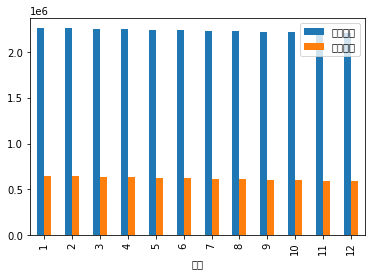

In [40]:
print( 원금균등대출금_PLT.plot(kind = 'bar') )

#### 한글폰트 설정

In [41]:
from matplotlib import rc

In [42]:
rc('font', family = 'Malgun Gothic')

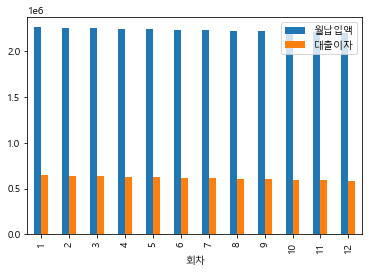

In [43]:
원금균등대출금_PLT.plot(kind = 'bar')

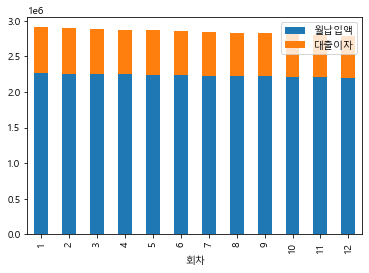

In [45]:
원금균등대출금_PLT.plot(kind = 'bar', stacked = True)

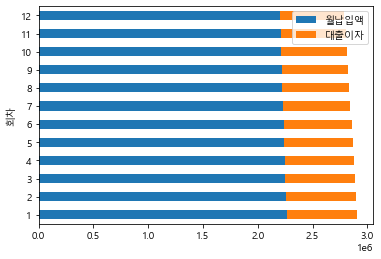

In [46]:
원금균등대출금_PLT.plot(kind = 'barh', stacked = True)